# Ad Sales Data
# Revenue Regression
Code link: https://www.kaggle.com/code/akshaysunil07/ad-tech-revenue-regression/notebook 

In [ ]:
# Installing packages

In [1]:
!pip install --upgrade pip
!pip install "snowflake-connector-python[pandas]" "snowflake-snowpark-python[pandas]" snowflake-snowpark-python==1.9.0 fosforio fosforml numpy pandas matplotlib scikit-learn xgboost seaborn python-dateutil tqdm holidays faker
!pip install --upgrade --q snowflake-snowpark-python==1.9.0
!pip uninstall urllib3 -y
!pip install urllib3==1.26.15

     |████████████████████████████████| 1.8MB 3.8MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 251.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 231.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of fosforml to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of fosforml to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need t

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 235.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 221.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.5/327.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 151.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 213.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.2/701.2 kB 336.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 221.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 kB 297.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 150.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 166.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 342.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 227.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 252.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 97.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 240.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 248.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 236.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 261.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 90.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 335.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow 2.10.0 requires packaging<24, but you have packaging 24.1 which is incompatible.
mlflow 2.10.0 requires pytz<2024, but you have pytz 2024.1 which is incompatible.
fosforml 1.0.0 requires cloudpickle==1.6.0, but you have cloudpickle 2.0.0 which is incompatible.
fosforml 1.0.0 requires PyYAML==6.0, but you have pyyaml 6.0.1 which is incompatible.
fosforml 1.0.0 requires urllib3==1.26.15, but you have urllib3 1.26.19 which is incompatible.
jupyterlab 3.2.4 requires jupyter-server~=1.4, but you have jupyter-server 2.0.0a1 which is incompatible.
jupyterlab-server 2.25.4 requires jsonschema>=4.18.0, but you have jsonschema 3.2.0 wh

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Matplotlib created a temporary cache directory at /tmp/matplotlib-xn2ro3lp because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
from fosforio import snowflake
from fosforml import *
from fosforml.constants import MLModelFlavours
from fosforio import get_dataframe
from matplotlib import pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import warnings; warnings.simplefilter('ignore')
from joblib import dump, load
import requests
from tqdm import tqdm
import time
import calendar

from time import sleep
import configparser
from dateutil.relativedelta import relativedelta
import datetime
from dateutil.easter import easter
from scipy.optimize import minimize_scalar
from scipy.optimize import curve_fit

%matplotlib inline

In [4]:
df1 = pd.read_csv('C:/Users/10738686/Downloads/ad_sales_data/ad_sales.csv')
df = df1.sample(n=50000,random_state=10).reset_index(drop=True)

# Exploratory data analysis

In [5]:
cat_col=['date','geo_id','order_id','site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']
scat_col = ['site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']
num_col=list(df.select_dtypes(np.number).columns)

In [ ]:
# Importing data from snowflake

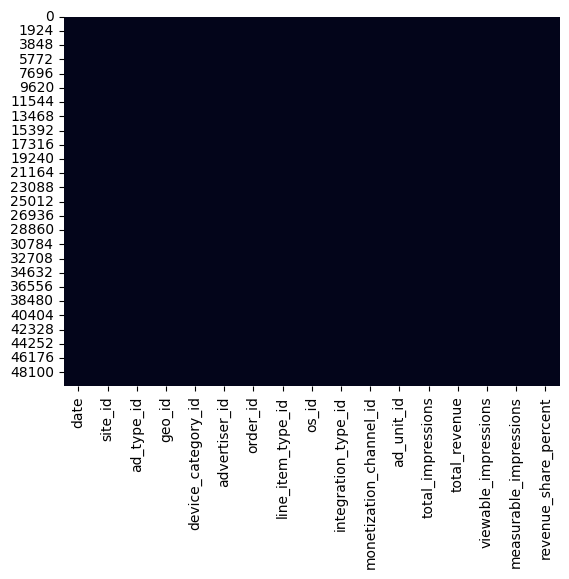

In [6]:
sns.heatmap(df.isnull(),cbar=False,cbar_kws={'color':'r'})
plt.show()

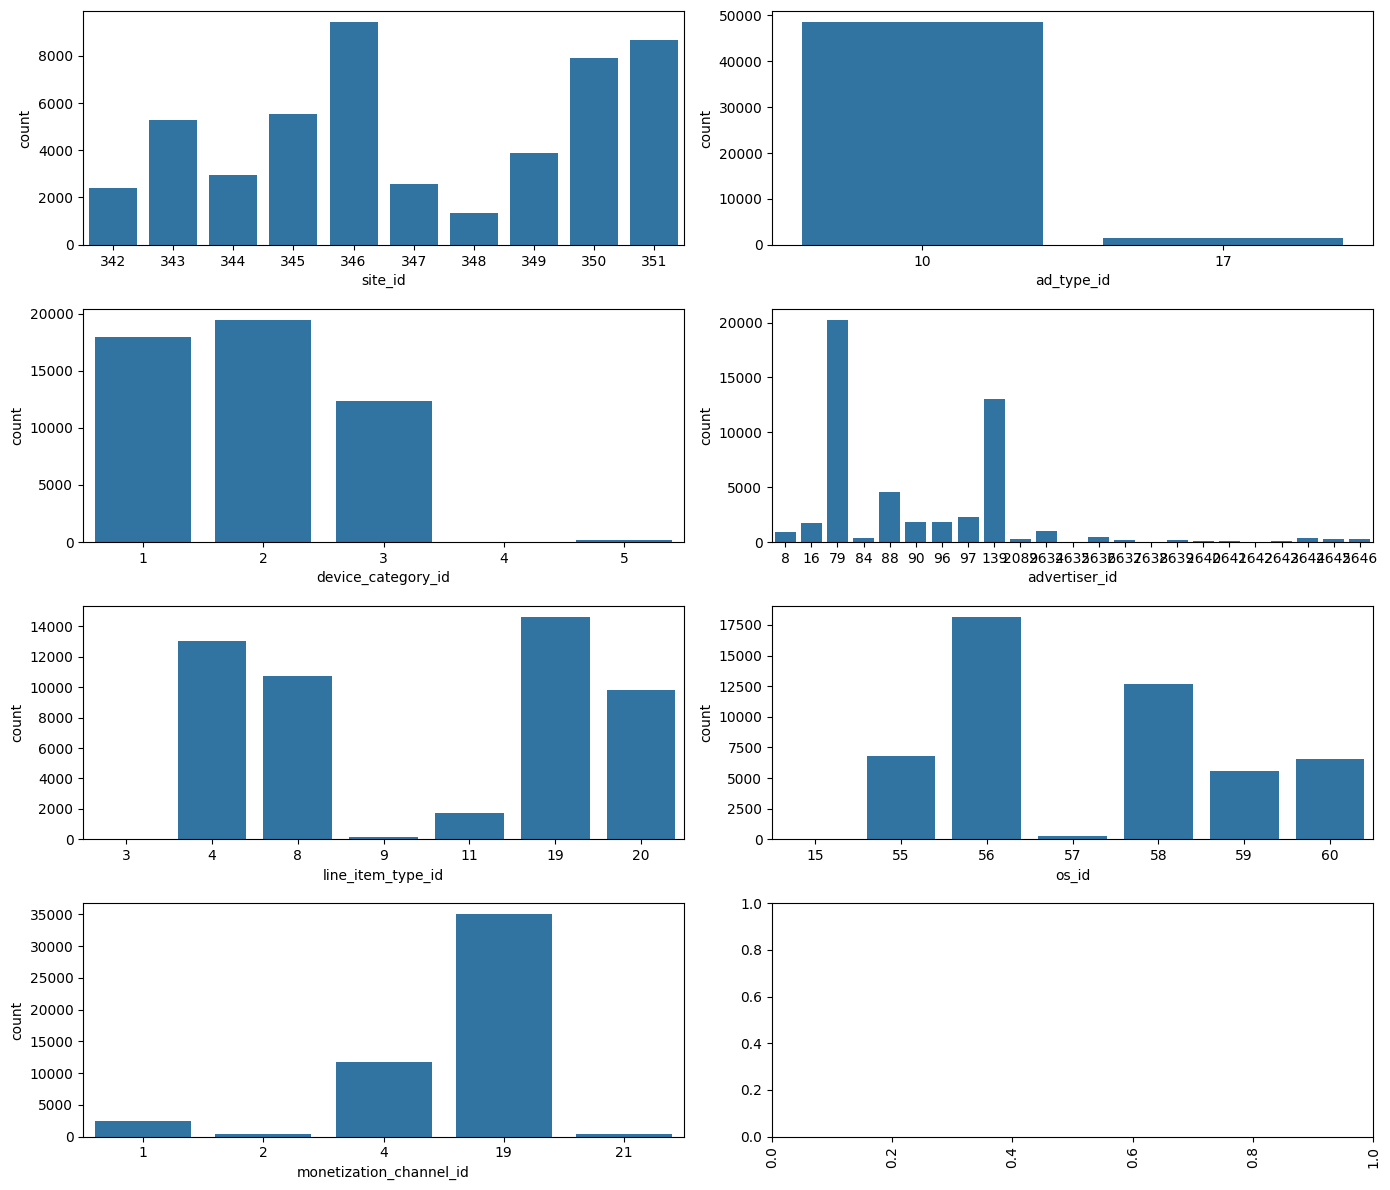

In [7]:
fig, ax = plt.subplots(4,2, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i,col in enumerate(scat_col):
    sns.countplot(data=df,x=col,ax=axes_[i])
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.tight_layout()

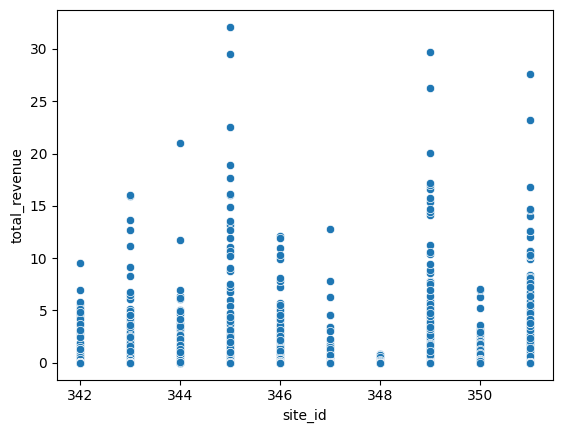

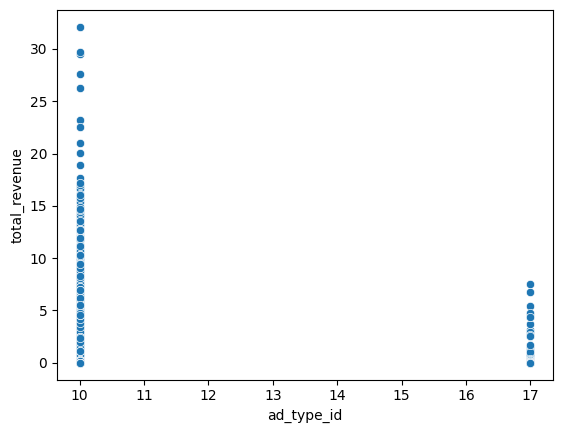

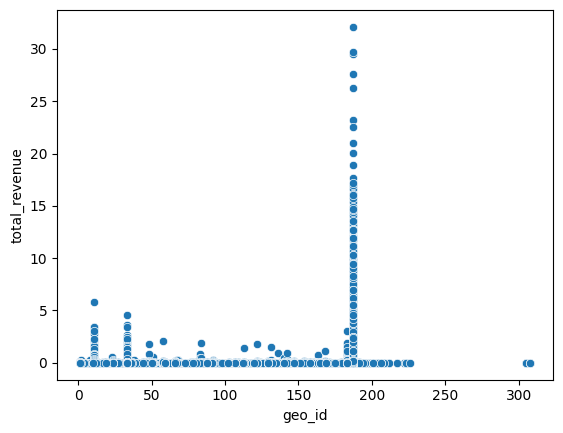

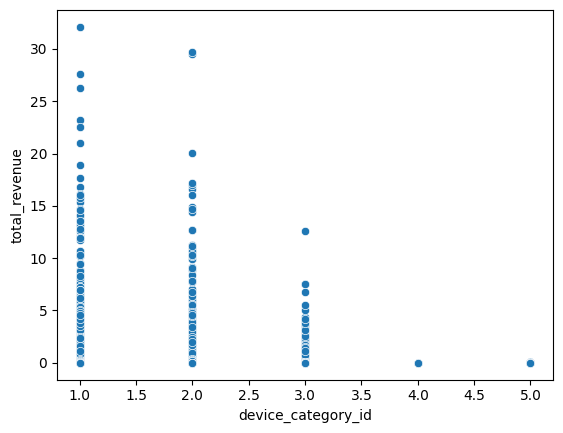

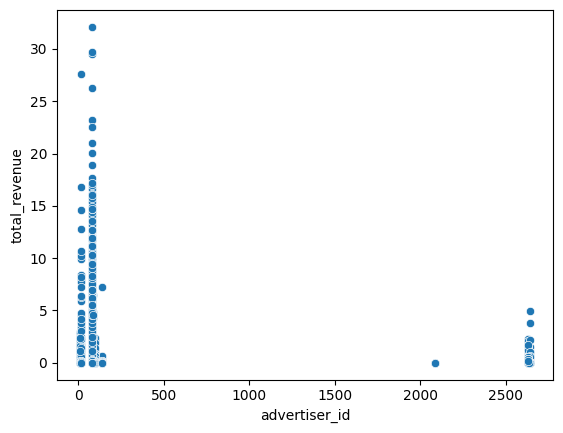

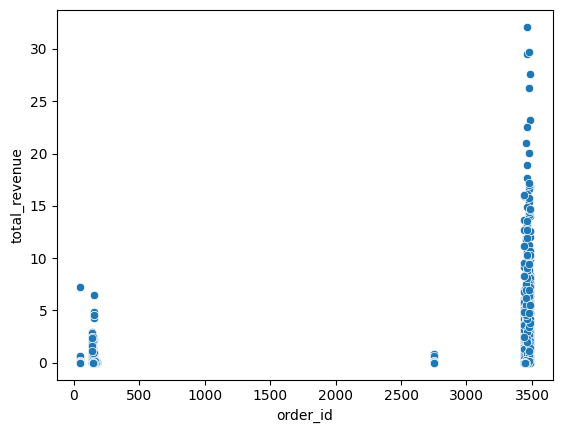

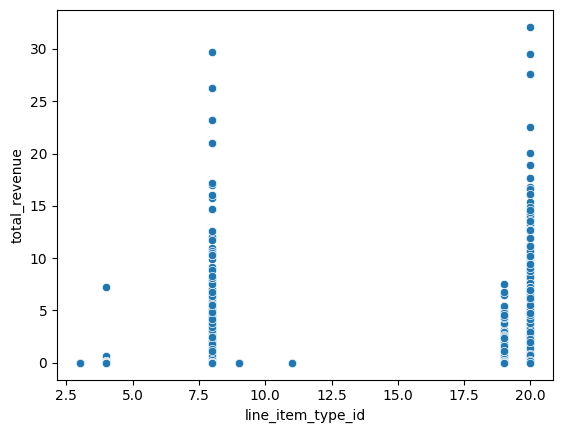

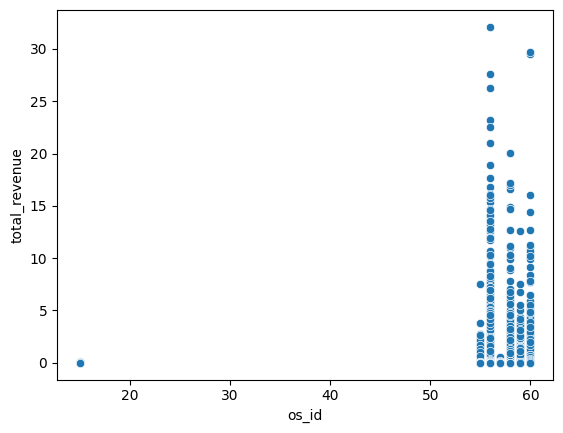

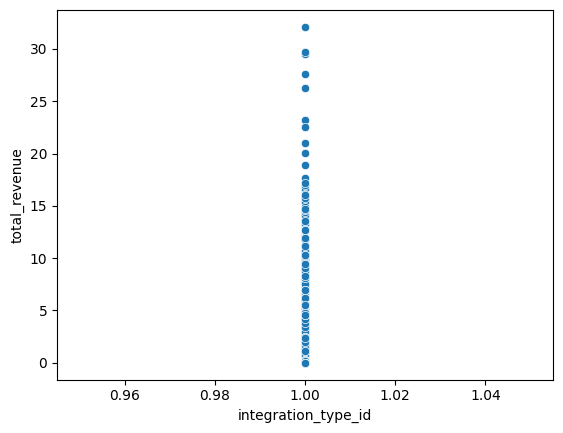

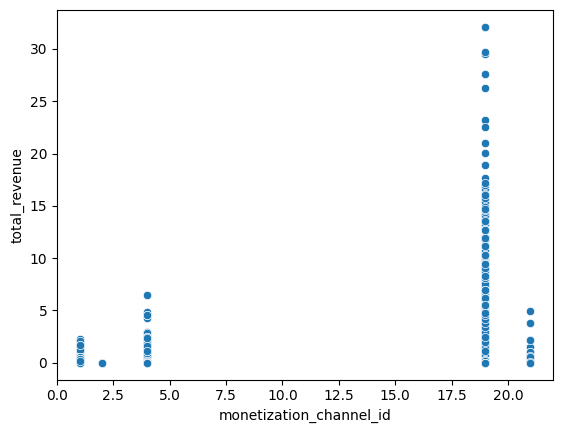

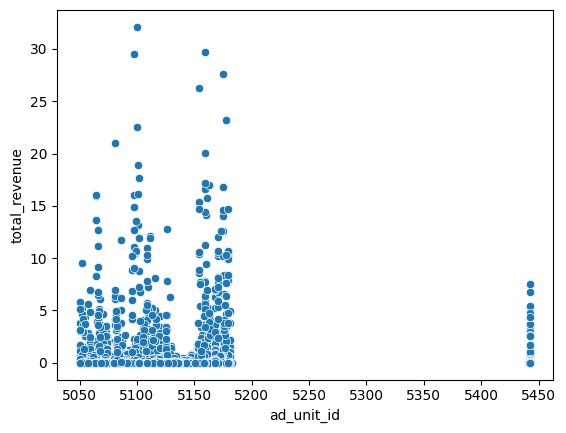

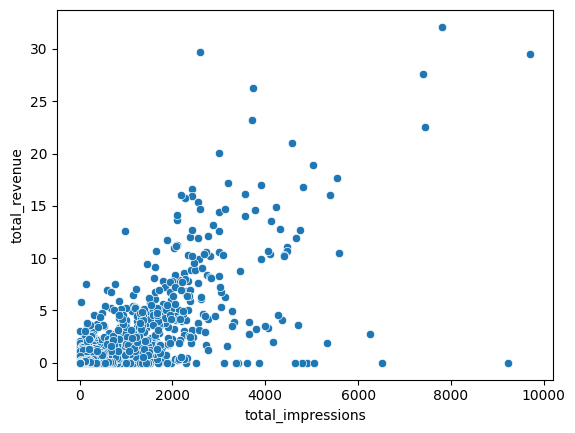

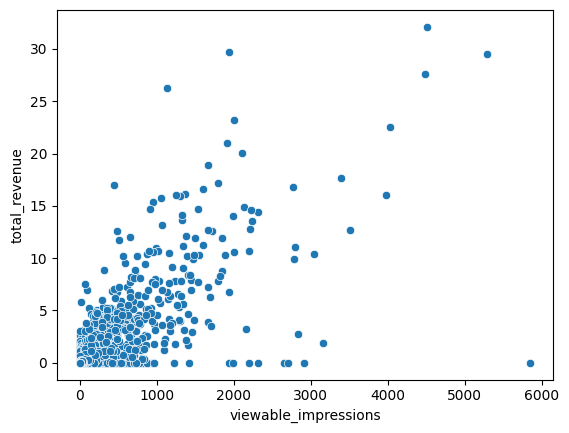

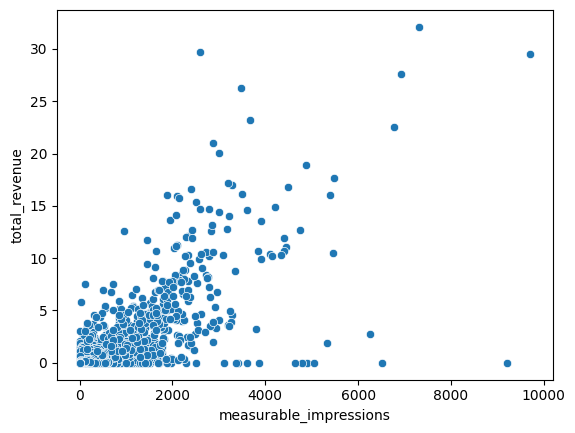

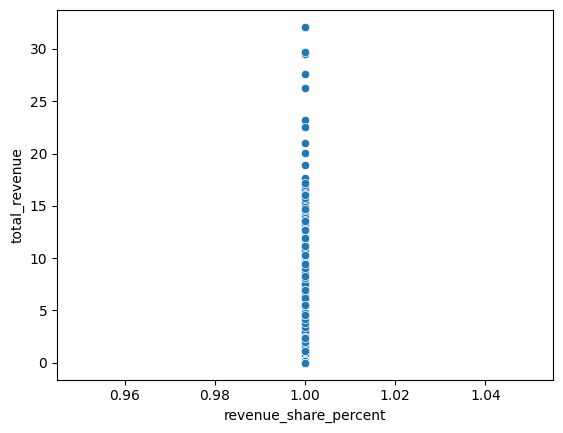

In [8]:
for i in num_col:
    if i!='total_revenue':
        sns.scatterplot(data=df,x=i,y='total_revenue')
        plt.show()

In [9]:
df1.max()

date                       30-06-2024 00:00
site_id                                 351
ad_type_id                               17
geo_id                                  308
device_category_id                        5
advertiser_id                          2646
order_id                               3489
line_item_type_id                        20
os_id                                    60
integration_type_id                       1
monetization_channel_id                  21
ad_unit_id                             5443
total_impressions                     14452
total_revenue                        83.822
viewable_impressions                   7392
measurable_impressions                13756
revenue_share_percent                     1
dtype: object

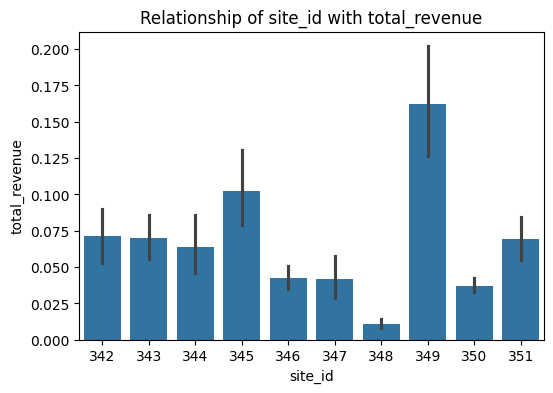

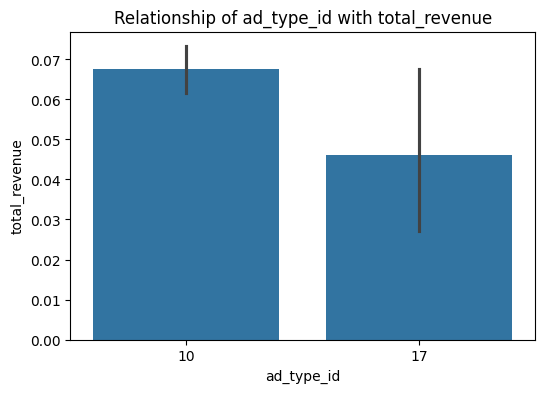

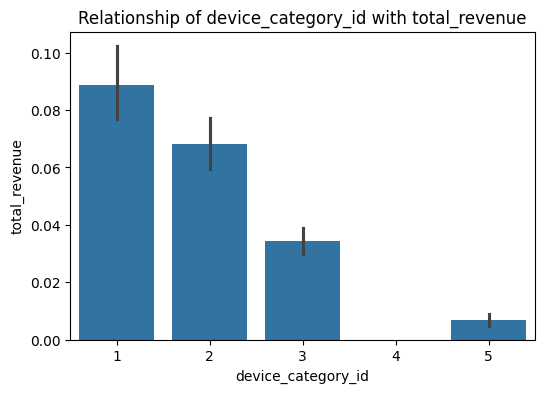

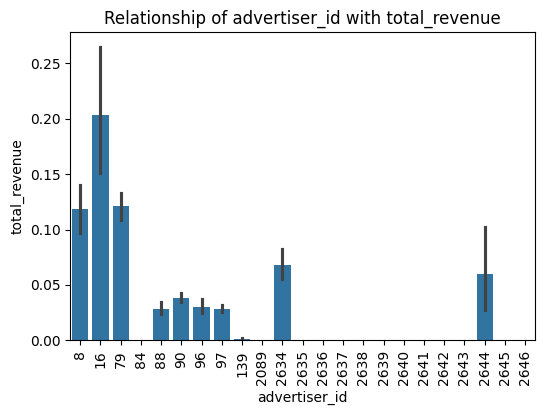

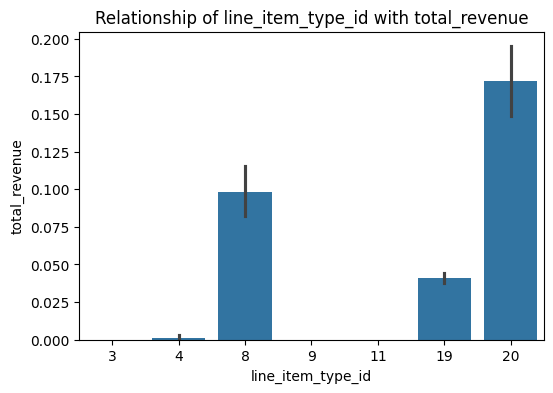

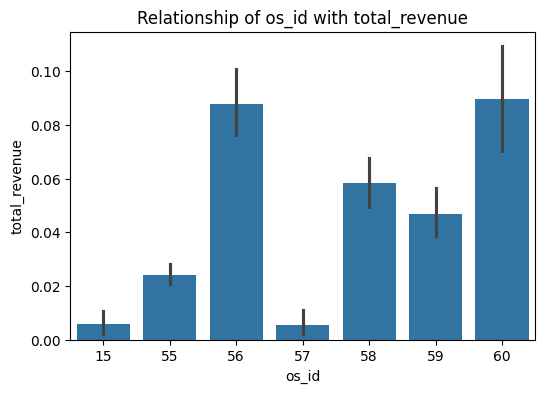

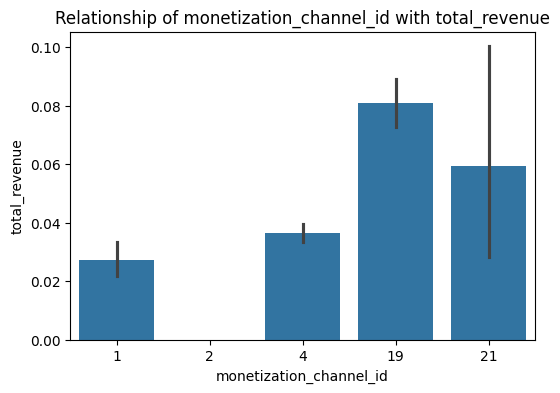

In [11]:
for col in (scat_col):
    title='Relationship of '+col+' with total_revenue'
    plt.figure(figsize=(6,4))
    sns.barplot(y=df['total_revenue'],x=df[col])
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

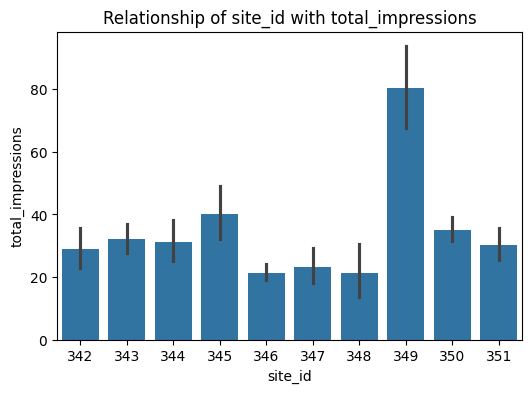

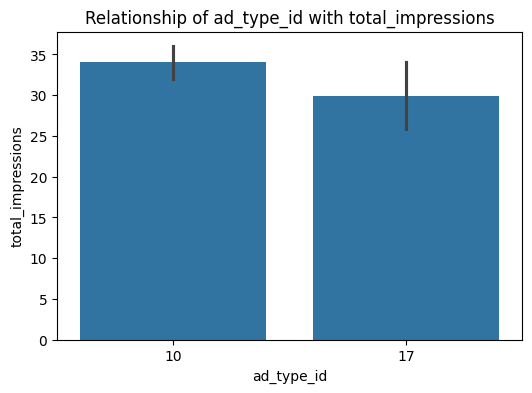

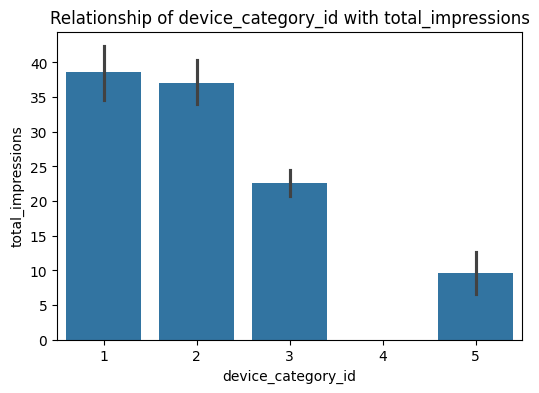

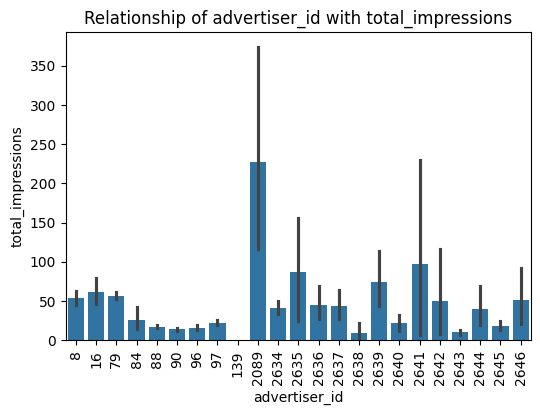

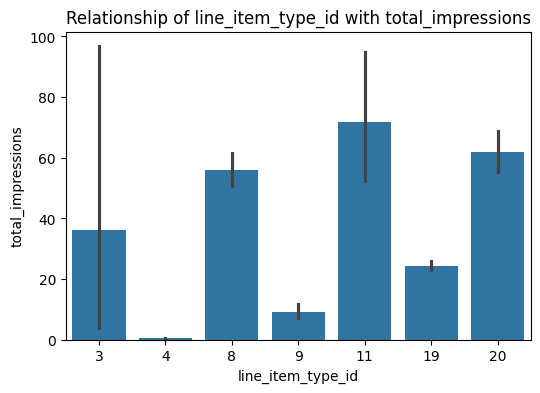

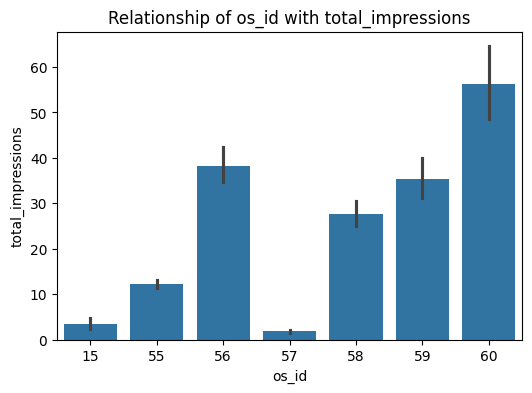

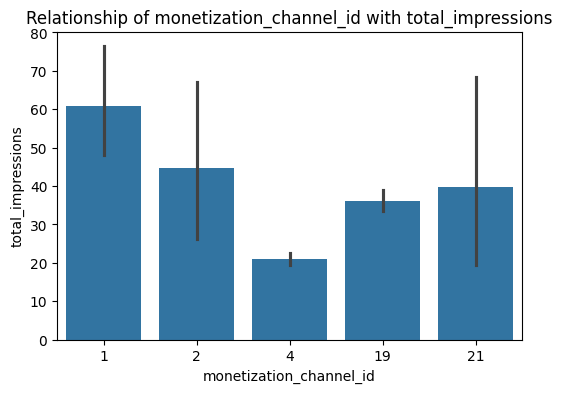

In [12]:
for col in (scat_col):
    title='Relationship of '+ col +' with total_impressions'
    plt.figure(figsize=(6,4))
    sns.barplot(y=df['total_impressions'],x=df[col],)
    if col=='advertiser_id':
        plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

In [13]:
cat_col=['date','geo_id','order_id','site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

scat_col = ['site_id', 'ad_type_id','device_category_id', 'advertiser_id',
         'line_item_type_id', 'os_id','monetization_channel_id']

for i in cat_col:
    df[i]=df[i].astype('object')

In [14]:
df.drop(['ad_unit_id','revenue_share_percent','integration_type_id'],axis=1,inplace=True)
df.drop(['ad_type_id','site_id','advertiser_id'],axis=1,inplace=True)
df.drop(['date','geo_id','order_id'],axis=1,inplace=True)

In [15]:
df.select_dtypes(object)

,device_category_id,line_item_type_id,os_id,monetization_channel_id
0,2,20,58,19
1,1,19,56,4
2,2,20,58,19
3,2,20,58,19
4,1,8,56,19
...,...,...,...,...
49995,3,19,55,4
49996,1,8,56,19
49997,2,4,58,19
49998,2,19,58,4


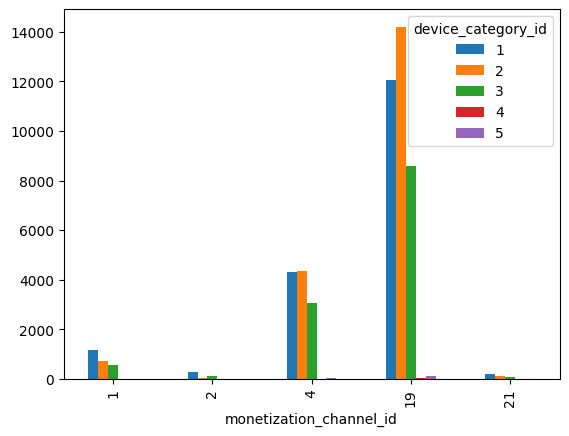

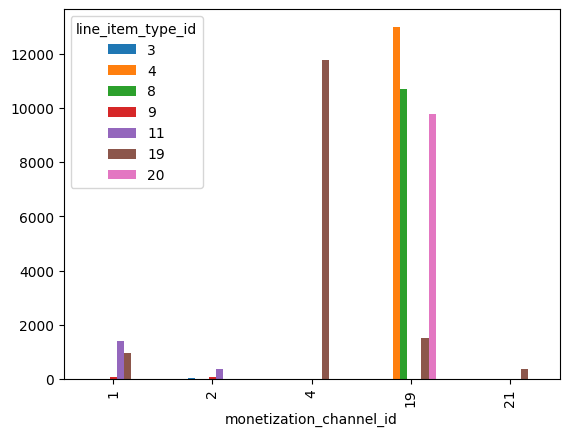

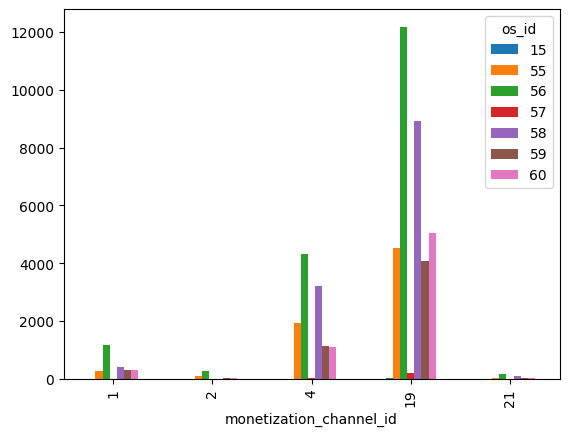

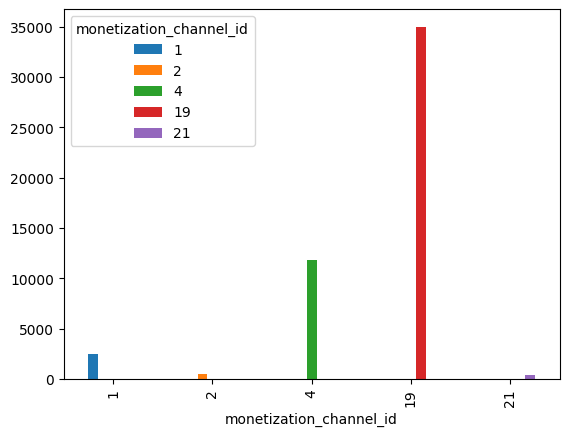

In [16]:
for i in df.select_dtypes(object).columns:
    pd.crosstab(df['monetization_channel_id'],df[i]).plot(kind='bar')
    plt.show()

# Predictive Modelling

In [17]:
Xd = df.drop('total_revenue',axis=1)
y = df['total_revenue']

In [18]:
X=pd.get_dummies(Xd,drop_first=True)

In [19]:
pc_col=['total_impressions', 'viewable_impressions', 'measurable_impressions']

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [21]:
X[pc_col]=pd.DataFrame(ss.fit_transform(X[pc_col]),columns=[pc_col])

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
# Applying PCA (principal component analysis)

In [23]:
from sklearn.decomposition import PCA
pc_col=['total_impressions', 'viewable_impressions', 'measurable_impressions']
pca = PCA()
pca.fit(X[pc_col])

PCA()

In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.95297602, 0.99862342, 1.        ])

In [25]:
pca = PCA(n_components=1)
cc = pca.fit_transform(X_train[pc_col])
cd = pca.transform(X_test[pc_col])

In [26]:
X_train['PC']=cc
X_test['PC']=cd

In [27]:
X_train.drop(pc_col,axis=1,inplace=True)
X_test.drop(pc_col,axis=1,inplace=True)

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [29]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error

In [30]:
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train)

print('Train')
print('R2 Score:',r2_score(y_train,y_train_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_train,y_train_pred))

y_test_pred=lr.predict(X_test)

print('\n\nTest')
print('R2 Score:',r2_score(y_test,y_test_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_test_pred))

Train
R2 Score: 0.651205076236357
Root Mean Squared Error: 0.3908758252084356
Mean Absolute Percentage Error: 84832227794569.78


Test
R2 Score: 0.5640498559665934
Root Mean Squared Error: 0.424755992722696
Mean Absolute Percentage Error: 96835135170261.38


In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rfr = RandomForestRegressor()

rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)

print('r2 Train',r2_score(y_train,y_train_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred=rfr.predict(X_test)

print('\n\nTest')
print('\nr2 Test',r2_score(y_test,y_test_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 Train 0.9612521718029114
RMSE Train: 0.13027989983447608


Test

r2 Test 0.7106982753056696
RMSE Train: 0.34601634434458656


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [34]:
rfrbest1 = {'max_depth': 12,
 'max_features': 8,
 'min_samples_leaf': 3,
 'n_estimators': 160}

In [35]:
rfr = RandomForestRegressor(**rfrbest1)

rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)

print('r2 Train',r2_score(y_train,y_train_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred=rfr.predict(X_test)

print('\n\nTest')
print('\nr2 Test',r2_score(y_test,y_test_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 Train 0.8453333234085754
RMSE Train: 0.2602867795872293


Test

r2 Test 0.7472750910025661
RMSE Train: 0.3234038059483134


# rfr = RandomForestRegressor() param_dist = {'n_estimators':sp_randint(25,250), 'max_features':sp_randint(1,24), 'max_depth':sp_randint(2,15), 'min_samples_leaf':sp_randint(1,50)} rsearch = RandomizedSearchCV(rfr,param_distributions=param_dist,scoring='r2', n_iter=10,cv=3,n_jobs=-1,random_state=4) rsearch.fit(X_train,y_train) rsearch.best_params_

In [36]:
rfrbest2 = {'max_depth': 12,
 'max_features': 15,
 'min_samples_leaf': 6,
 'n_estimators': 154}

In [37]:
rfr = RandomForestRegressor(**rfrbest2)

rfr.fit(X_train,y_train)
y_train_pred=rfr.predict(X_train)

print('r2 Train',r2_score(y_train,y_train_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

y_test_pred=rfr.predict(X_test)

print('\n\nTest')
print('\nr2 Test',r2_score(y_test,y_test_pred))
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

r2 Train 0.8040041679221706
RMSE Train: 0.2930064301721836


Test

r2 Test 0.7419507507919001
RMSE Train: 0.3267927417585921


In [38]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfr = RandomForestRegressor()

param_dist = {'n_estimators':np.arange(50,250,50), 'max_features':np.arange(1,21,4), 'max_depth':[1,5,10,15], 'min_samples_leaf':[1,5,10,20,40,50]}

rsearch = GridSearchCV(rfr,param_grid=param_dist,scoring='r2', cv=3,n_jobs=-1) 
rsearch.fit(X_train,y_train) 
rsearch.bestparams

In [ ]:
rfr = RandomForestRegressor(**rsearch.bestparams)
rfr.fit(X_train,y_train) y_train_pred=rfr.predict(X_train)
print('r2 Train',r2_score(y_train,y_train_pred)) 
print('RMSE Train:',np.sqrt(mean_squared_error(y_train,y_train_pred)))

In [ ]:
y_test_pred=rfr.predict(X_test)
print('\n\nTest') 
print('\nr2 Test',r2_score(y_test,y_test_pred)) 
print('RMSE Train:',np.sqrt(mean_squared_error(y_test,y_test_pred)))